# Convolution
$I'(x, y) = \sum_{i=-a}^a \sum_{j=-b}^b K(i,j)I(x - i, y - j)$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [43]:
def convolution(kernel, img):
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=float)
    #print(base)
    #ans = img.copy()
    ans = np.zeros(img.shape)
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            imgCheck = imgKern * kernel
            
            ans[i-int(kN/2),j-int(kM/2)] = np.sum(imgCheck)
    return ans

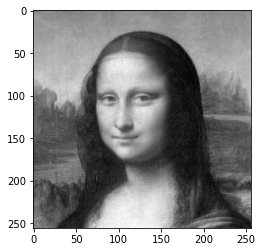

In [62]:
img = cv2.imread('mona.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

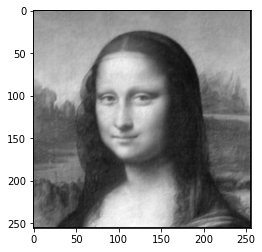

In [63]:
kernel = np.array([[1, 4, 7, 4, 1],
                [4, 16, 26, 16, 4],
                 [7, 26, 41, 26, 7],
                [4, 16, 26, 16, 4],
                   [1, 4, 7, 4, 1]]
                   ) / 273
kernel = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
])
ans = convolution(kernel, img)
plt.imshow(ans, cmap='gray')

In [65]:
ans 

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 226., 215., ..., 240., 245.,   0.],
       [  0., 227., 221., ..., 245., 248.,   0.],
       ...,
       [  0., 221., 222., ...,  45.,  39.,   0.],
       [  0., 239., 235., ...,  50.,  44.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [67]:
chido = cv2.filter2D(img,-1,kernel)

In [70]:
chido.shape

(256, 256)

In [81]:
np.all((ans[1:-1,1:-1] == chido[1:-1,1:-1]) == True)

False

In [78]:
ans.shape

(256, 256)

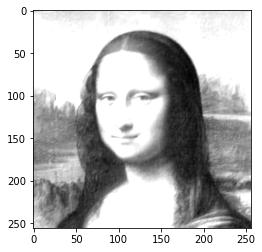

In [64]:
plt.imshow(cv2.filter2D(img,-1,kernel), cmap='gray')

In [47]:
img2 = (np.log(abs(np.fft.fftshift(np.fft.fft2(img)))))

In [50]:
abs(np.fft.fftshift(np.fft.fft2(img)))

array([[ 84.        , 258.01739938, 176.11428801, ..., 240.96203916,
        176.11428801, 258.01739938],
       [160.01326797, 583.85548768, 371.51210422, ..., 602.70563069,
        199.50702892, 188.33754496],
       [246.75021019, 343.1755475 , 351.92939843, ..., 820.66846425,
        214.75544791, 310.39148644],
       ...,
       [208.23370343, 250.48050141, 485.93027399, ..., 430.92094169,
        254.50266629,  89.34432782],
       [246.75021019, 310.39148644, 214.75544791, ..., 459.60793047,
        351.92939843, 343.1755475 ],
       [160.01326797, 188.33754496, 199.50702892, ..., 136.52398057,
        371.51210422, 583.85548768]])

In [51]:
img3 = np.fft.fftshift(np.fft.fft2(img))


In [52]:
img3

array([[ -84.        -1.39266376e-12j, -166.13610288-1.97412699e+02j,
         167.66014578-5.39102769e+01j, ...,
         178.29081345-1.62095929e+02j,  167.66014578+5.39102769e+01j,
        -166.13610288+1.97412699e+02j],
       [  70.18496463-1.43799571e+02j,  530.03057673+2.44856730e+02j,
        -342.50248851+1.43921121e+02j, ...,
         105.97695026+5.93315231e+02j,  -59.95373502+1.90285586e+02j,
        -134.72162623-1.31609704e+02j],
       [ 246.2457889 -1.57695173e+01j,  240.89265883+2.44418050e+02j,
         346.35485962-6.23908061e+01j, ...,
        -404.92163024-7.13817345e+02j,  191.28962673+9.76124024e+01j,
         227.7182905 -2.10920020e+02j],
       ...,
       [ -70.54590721+1.95919755e+02j,  250.35451927-7.94331571e+00j,
        -485.64503594-1.66472295e+01j, ...,
          20.56156511+4.30430111e+02j,  224.83313793+1.19254632e+02j,
          74.48303027-4.93425487e+01j],
       [ 246.2457889 +1.57695173e+01j,  227.7182905 +2.10920020e+02j,
         191.28962673-

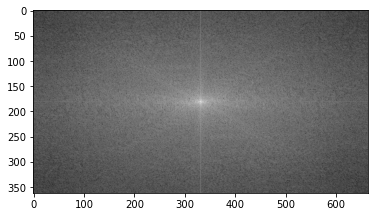

In [54]:
plt.imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(img)))), cmap='gray')

In [43]:
np.fft.fftshift(np.fft.fft2(img))

array([[ -84.        -1.39266376e-12j, -166.13610288-1.97412699e+02j,
         167.66014578-5.39102769e+01j, ...,
         178.29081345-1.62095929e+02j,  167.66014578+5.39102769e+01j,
        -166.13610288+1.97412699e+02j],
       [  70.18496463-1.43799571e+02j,  530.03057673+2.44856730e+02j,
        -342.50248851+1.43921121e+02j, ...,
         105.97695026+5.93315231e+02j,  -59.95373502+1.90285586e+02j,
        -134.72162623-1.31609704e+02j],
       [ 246.2457889 -1.57695173e+01j,  240.89265883+2.44418050e+02j,
         346.35485962-6.23908061e+01j, ...,
        -404.92163024-7.13817345e+02j,  191.28962673+9.76124024e+01j,
         227.7182905 -2.10920020e+02j],
       ...,
       [ -70.54590721+1.95919755e+02j,  250.35451927-7.94331571e+00j,
        -485.64503594-1.66472295e+01j, ...,
          20.56156511+4.30430111e+02j,  224.83313793+1.19254632e+02j,
          74.48303027-4.93425487e+01j],
       [ 246.2457889 +1.57695173e+01j,  227.7182905 +2.10920020e+02j,
         191.28962673-

In [32]:
ff = np.fft.fft2(img.reshape(1,-1))

In [37]:
ff = ff[0]

D:\Users\ricar\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


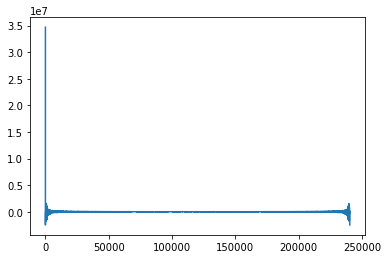

In [40]:
plt.plot(np.arange(ff.shape[0]), ff)

In [21]:
img.shape

(362, 664)

D:\Users\ricar\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


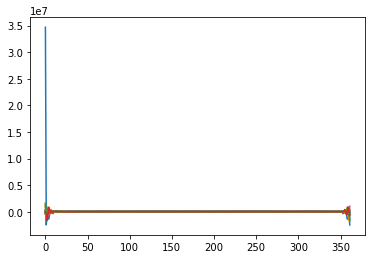

In [23]:
plt.plot(ff)